# STA365 Homework 2

## Question 1

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial} \\
&&& \propto \theta^x(1-\theta)^{n-x}
\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}


![title](img/hw2_q1.png)

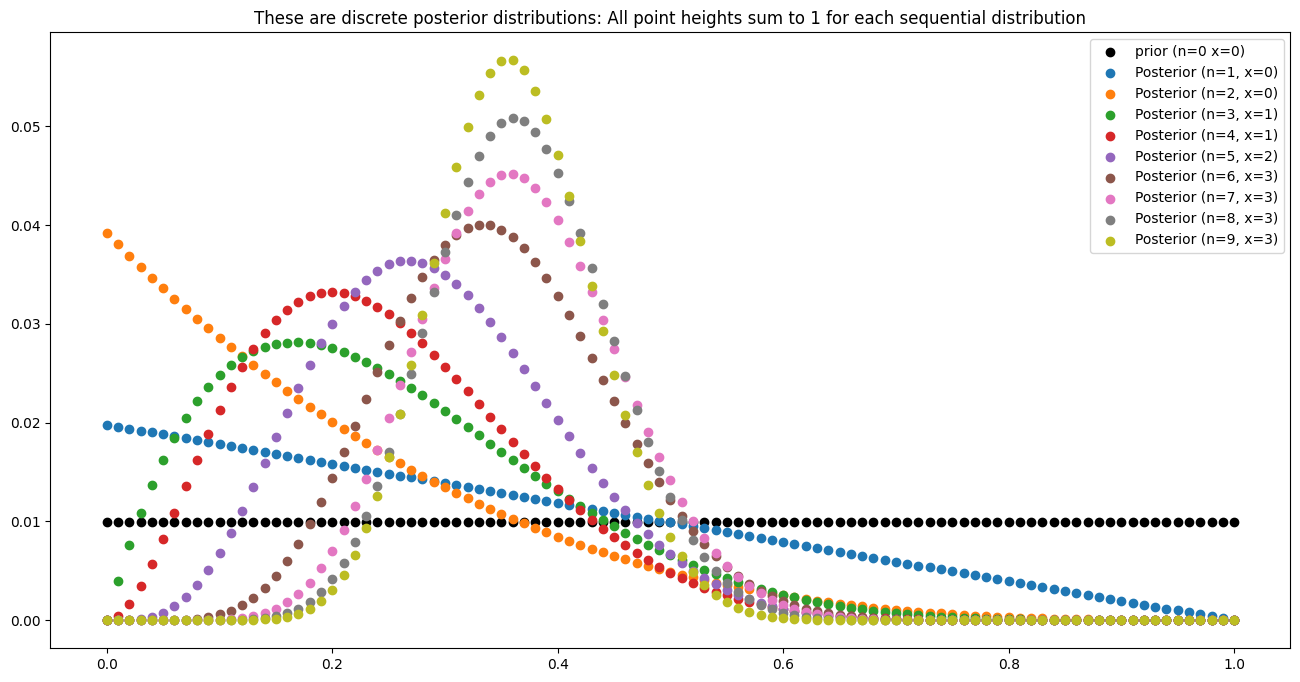

In [5]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = [0,0,1,0,1,1,0,0,0]
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    # do updates in a truly sequential manner using Bernoulli
    likelihood = stats.binom.pmf(k=x, n=n, p=parameter_domain)
    
    posterior = likelihood * prior
    posterior /= posterior.sum()  
    
    # for each observation update
    prior = posterior.copy()  
    
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")
    
plt.legend();

## Question 2

1. $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}$$ is Beta distribution

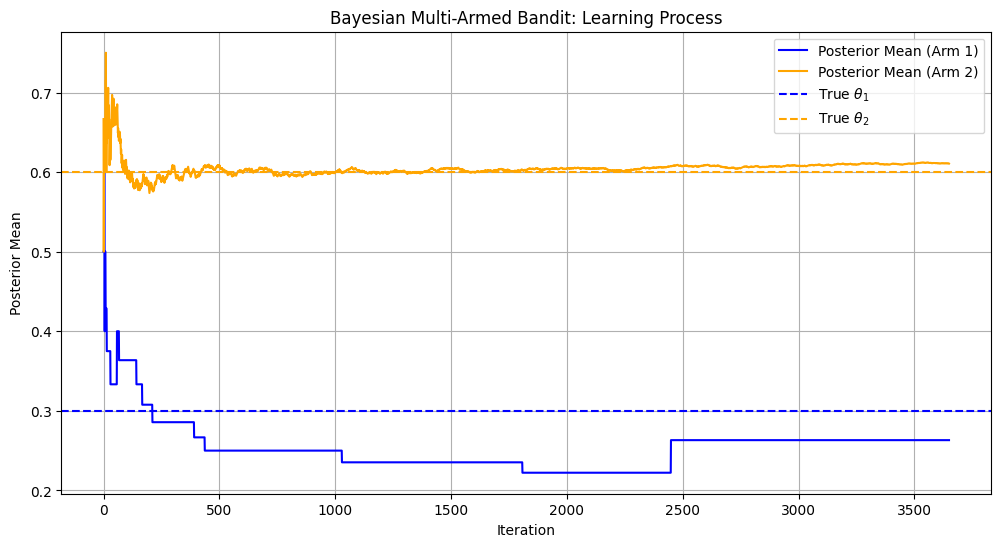

Final Posterior Mean (Arm 1): 0.263
Final Posterior Mean (Arm 2): 0.611


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# seed
np.random.seed(365)

# true parameters 
theta1_true = 0.3
theta2_true = 0.6

# inite
n1, x1 = 0, 0
n2, x2 = 0, 0

# 1. Beta prior for coin flip
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# set number of iteration
m = 3650

posterior_means_arm1 = []
posterior_means_arm2 = []

# 2. iterate using `for` loop
for t in range(m):
    # 3. posterior
    samples_theta1 = np.random.beta(alpha1 + x1, beta1 + n1 - x1, size=1000)
    samples_theta2 = np.random.beta(alpha2 + x2, beta2 + n2 - x2, size=1000)
    prob_theta1_less_than_theta2 = np.mean(samples_theta1 < samples_theta2)
    
    if np.random.rand() < prob_theta1_less_than_theta2:
        n2 += 1
        if np.random.rand() < theta2_true:
            x2 += 1
    else:
        n1 += 1
        if np.random.rand() < theta1_true:
            x1 += 1

    # 4. update
    posterior_means_arm1.append((alpha1 + x1) / (alpha1 + beta1 + n1))
    posterior_means_arm2.append((alpha2 + x2) / (alpha2 + beta2 + n2))

plt.figure(figsize=(12, 6))

plt.plot(posterior_means_arm1, label='Posterior Mean (Arm 1)', color='blue')
plt.plot(posterior_means_arm2, label='Posterior Mean (Arm 2)', color='orange')
plt.axhline(theta1_true, linestyle='--', color='blue', label=r'True $\theta_1$')
plt.axhline(theta2_true, linestyle='--', color='orange', label=r'True $\theta_2$')

plt.title('Bayesian Multi-Armed Bandit: Learning Process')
plt.xlabel('Iteration')
plt.ylabel('Posterior Mean')
plt.legend()
plt.grid()
plt.show()

print(f"Final Posterior Mean (Arm 1): {posterior_means_arm1[-1]:.3f}")
print(f"Final Posterior Mean (Arm 2): {posterior_means_arm2[-1]:.3f}")

## Question 3

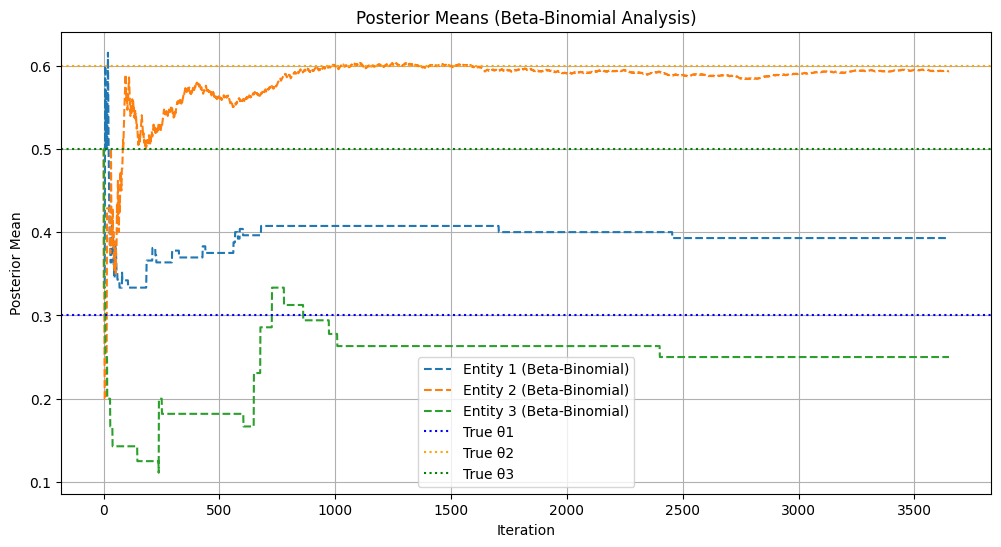

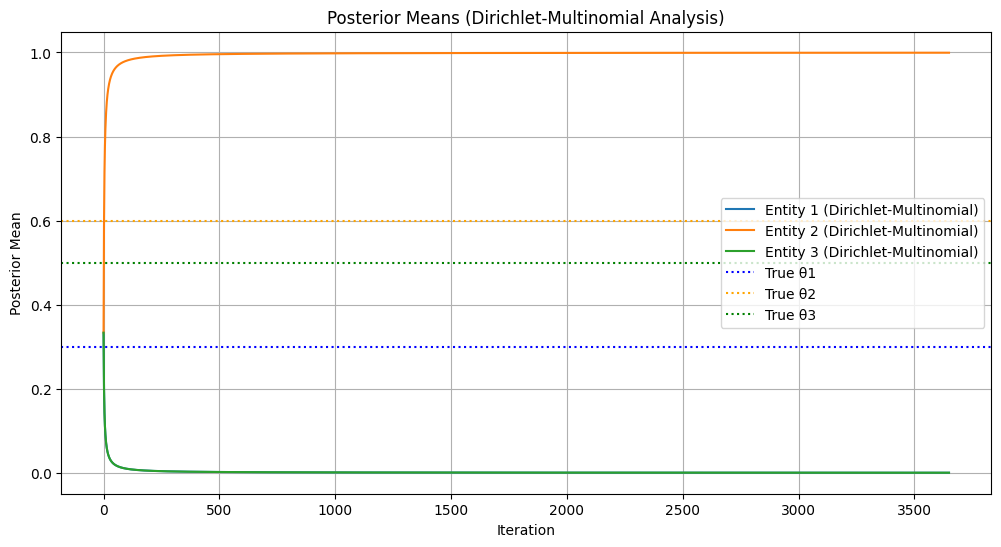

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# seed
np.random.seed(365)

# true theta
theta_true = [0.3, 0.6, 0.5] 

# Initialize Analysis 1 (Beta-Binomial)
n_beta = [0, 0, 0]  
x_beta = [0, 0, 0]  
alpha_prior_beta = [1, 1, 1]  
beta_prior_beta = [1, 1, 1]  

# Initialize Analysis 2 (Dirichlet-Multinomial)
alpha_prior_dirichlet = np.array([1, 1, 1]) 
n_dirichlet = np.array([0, 0, 0])  

m = 3650 

posterior_means_beta = {i: [] for i in range(3)}  
posterior_means_dirichlet = []  

# Start simulation
for t in range(m):
    # --- Analysis 1 (Beta-Binomial) ---
    posteriors_beta = [beta(alpha_prior_beta[i] + x_beta[i],
                            beta_prior_beta[i] + n_beta[i] - x_beta[i])
                       for i in range(3)]
    
    sampled_thetas_beta = [post.rvs(size=1)[0] for post in posteriors_beta]
    
    chosen_entity_beta = np.argmax(sampled_thetas_beta)
    
    outcome_beta = np.random.rand() < theta_true[chosen_entity_beta]
    n_beta[chosen_entity_beta] += 1
    if outcome_beta:
        x_beta[chosen_entity_beta] += 1
    
    for i in range(3):
        posterior_means_beta[i].append(posteriors_beta[i].mean())
    
    # --- Analysis 2 (Dirichlet-Multinomial) ---
    alpha_post_dirichlet = alpha_prior_dirichlet + n_dirichlet
    
    sampled_thetas_dirichlet = dirichlet.rvs(alpha_post_dirichlet, size=1)[0]
    
    chosen_entity_dirichlet = np.argmax(sampled_thetas_dirichlet)
    
    outcome_dirichlet = np.random.rand() < theta_true[chosen_entity_dirichlet]
    n_dirichlet[chosen_entity_dirichlet] += 1  
    
    posterior_means_dirichlet.append(alpha_post_dirichlet / alpha_post_dirichlet.sum())


# Plot Beta-Binomial posterior means
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(posterior_means_beta[i], label=f'Entity {i+1} (Beta-Binomial)', linestyle='--')
plt.axhline(theta_true[0], color='blue', linestyle=':', label='True θ1')
plt.axhline(theta_true[1], color='orange', linestyle=':', label='True θ2')
plt.axhline(theta_true[2], color='green', linestyle=':', label='True θ3')
plt.title('Posterior Means (Beta-Binomial Analysis)')
plt.xlabel('Iteration')
plt.ylabel('Posterior Mean')
plt.legend()
plt.grid()
plt.show()

# Plot Dirichlet-Multinomial posterior means
posterior_means_dirichlet = np.array(posterior_means_dirichlet)
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(posterior_means_dirichlet[:, i], label=f'Entity {i+1} (Dirichlet-Multinomial)')
plt.axhline(theta_true[0], color='blue', linestyle=':', label='True θ1')
plt.axhline(theta_true[1], color='orange', linestyle=':', label='True θ2')
plt.axhline(theta_true[2], color='green', linestyle=':', label='True θ3')
plt.title('Posterior Means (Dirichlet-Multinomial Analysis)')
plt.xlabel('Iteration')
plt.ylabel('Posterior Mean')
plt.legend()
plt.grid()
plt.show()

The sequential approach is more appropriate when deploying the Beysian multi-armed bandit (in my case at least, the Dirichlet-Multinomial in batch one literally do not work)